In [2]:
!pip install -q pandas==1.5.3


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [3]:

# Imports
import pandas as pd
from pandas import DataFrame

print('Panda version:', pd.__version__)


Panda version: 1.5.3


In [4]:

# Reading data
data = pd.read_csv("dados/dataset.csv")


In [5]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# 1:Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?    

somatorios = data[data.Categoria == 'Office Supplies'][['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum()
# print(somatorios.sort_values(by='Valor_Venda', ascending=False))

cidadeComMaiorValorVenda = somatorios.query('Valor_Venda == Valor_Venda.max()')
print(cidadeComMaiorValorVenda)

               Valor_Venda
Cidade                    
New York City    68362.814


In [7]:
# R1:
data_p1 = data[data['Categoria'] == 'Office Supplies']
data_p1_total = data_p1.groupby('Cidade')['Valor_Venda'].sum()
# print(data_p1.groupby('Cidade')['Valor_Venda'].groups)

cidade_maior_venda = data_p1_total.idxmax()
print(cidade_maior_venda)

# Validando resultado
# data_p1_total.sort_values(ascending = False)

New York City


/tmp/ipykernel_3263/2738479420.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Data_Pedido"] = data["Data_Pedido"].astype('datetime64[ns]')


<class 'pandas.core.frame.DataFrame'>


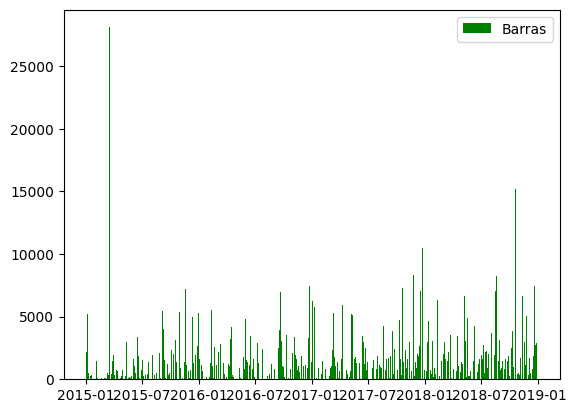

In [8]:
# 2:Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.    

import matplotlib.pyplot as plt
%matplotlib inline

data["Data_Pedido"] = data["Data_Pedido"].astype('datetime64[ns]')
total_vendas = data[['Data_Pedido', 'Valor_Venda']].groupby('Data_Pedido').sum()
print(type(total_vendas))
total_vendas_ordered = total_vendas.sort_values(by='Data_Pedido', ascending=True)

plt.bar(total_vendas_ordered.index, total_vendas_ordered['Valor_Venda'].to_numpy(), label = 'Barras', color = 'green')
plt.legend()
plt.show()

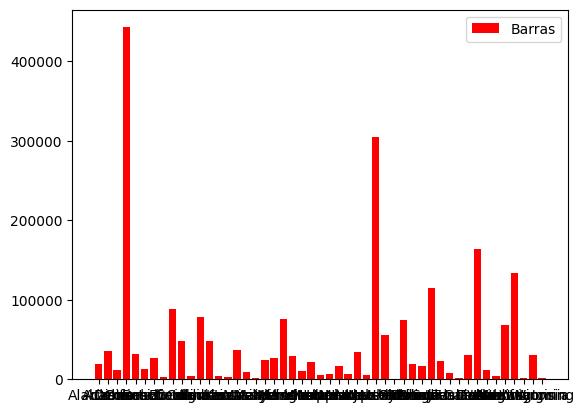

In [9]:
#3 Qual o Total de Vendas por Estado?
# Demonstre o resultado através de um gráfico de barras.

# total_vendas_por_estado = data.groupby('Estado')['Valor_Venda'].sum()
# print(type(total_vendas_por_estado['Valor_Venda']))

total_vendas_por_estado = data[['Estado', 'Valor_Venda']].groupby('Estado').sum()

plt.bar(total_vendas_por_estado.index, total_vendas_por_estado['Valor_Venda'].to_numpy(), label = 'Barras', color = 'red')
plt.legend()
plt.show()


In [10]:
#4 Quais São as 10 Cidades com Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de barras

top_dez = data[['Cidade', 'Valor_Venda']].groupby('Cidade').sum().sort_values(by='Valor_Venda', ascending=False).head(10)
print(top_dez)

               Valor_Venda
Cidade                    
New York City  251749.2190
Los Angeles    171654.6330
Seattle        114725.4780
San Francisco  107489.9520
Philadelphia   107197.8030
Houston         61590.1868
San Diego       47458.3790
Chicago         46974.3430
Jacksonville    44713.1830
Detroit         42446.9440


              Valor_Venda
Segmento                 
Consumer     1.133834e+06
Corporate    6.792322e+05
Home Office  4.224914e+05
[1133834.335   679232.1868  422491.4329]
['Consumer' 'Corporate' 'Home Office']


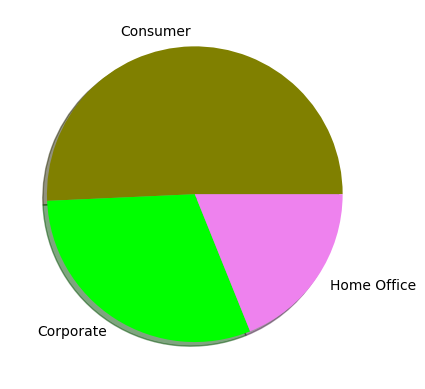

In [11]:
#5 Qual Segmento Teve o Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de pizza.
segmento_maior_total = data[['Segmento', 'Valor_Venda']].groupby('Segmento').sum()
print(segmento_maior_total)

fatias = segmento_maior_total['Valor_Venda'].to_numpy()
segmentos = segmento_maior_total.index.values
print(fatias)
print(segmentos)
cores = ['olive', 'lime', 'violet']

plt.pie(fatias, labels = segmentos, colors = cores, startangle = 0, shadow = True, explode = (0,0,0))
plt.show()

In [12]:
#6 Qual o Total de Vendas Por Segmento e Por Ano?
data['Ano'] = data['ID_Pedido'].str.split('-').str[1]


total = data[['Segmento', 'Ano', 'Valor_Venda']].groupby(['Segmento', 'Ano']).sum()
print(total)


                  Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849


In [13]:
#7 Pergunta de Negócio 7 (Desafio Nível Júnior):

# Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

# - Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
# - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?
vendas_com_15 = data.query("Valor_Venda > 1000").size

print(vendas_com_15)

5484


In [14]:
#8 Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

# Criando novo DataFrame para edição: 
vendas_com_15 = data.loc[data["Valor_Venda"] > 1000, ['Valor_Venda'] ]
vendas_com_15["Valor_com_15_desc"] = vendas_com_15["Valor_Venda"] * 85 / 100
# print(vendas_com_15)

media_antes = vendas_com_15.Valor_Venda.mean()
print('Media antes:', media_antes)

media_depois = vendas_com_15.Valor_com_15_desc.mean()
print('Media depois:', media_depois)



Media antes: 2116.8078153172864
Media depois: 1799.2866430196934


In [18]:
#9 Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

media_por_segmento = data[['Segmento', 'Valor_Venda']].groupby(['Segmento']).mean()
media_por_ano = data[['Ano', 'Valor_Venda']].groupby(['Ano']).mean()
media_por_mes = data[['Ano', 'Valor_Venda']].groupby(['Segmento']).mean()

print(media_por_segmento)
print(media_por_ano)
print(media_por_mes)

             Valor_Venda
Segmento                
Consumer      225.011775
Corporate     231.819859
Home Office   244.073618
      Valor_Venda
Ano              
2015   245.064342
2016   222.148980
2017   237.292118
2018   221.745479


In [ ]:
#10Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?  Demonstre tudo através de um único gráfico.